# 1. Introducion to data visualization

## 1.1. The need of data visualization
The [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) comprises 4 datasets that have nearly identical simple descriptive statistics, however they appear very differently when plotted. These statistics are:
- Number of observations of $\mathbf{x}$ and $\mathbf{y}$
- Mean of $\mathbf{x}$ and $\mathbf{y}$ ($\mu$)
- Variance of $\mathbf{x}$ and $\mathbf{y}$ ($\sigma^2$)
- Correlation coefficient between $\mathbf{x}$ and $\mathbf{y}$ ($\rho_{\mathbf{x},\mathbf{y}}$)
- Linear regression equation
- Coefficient of determinant ($R^2$)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

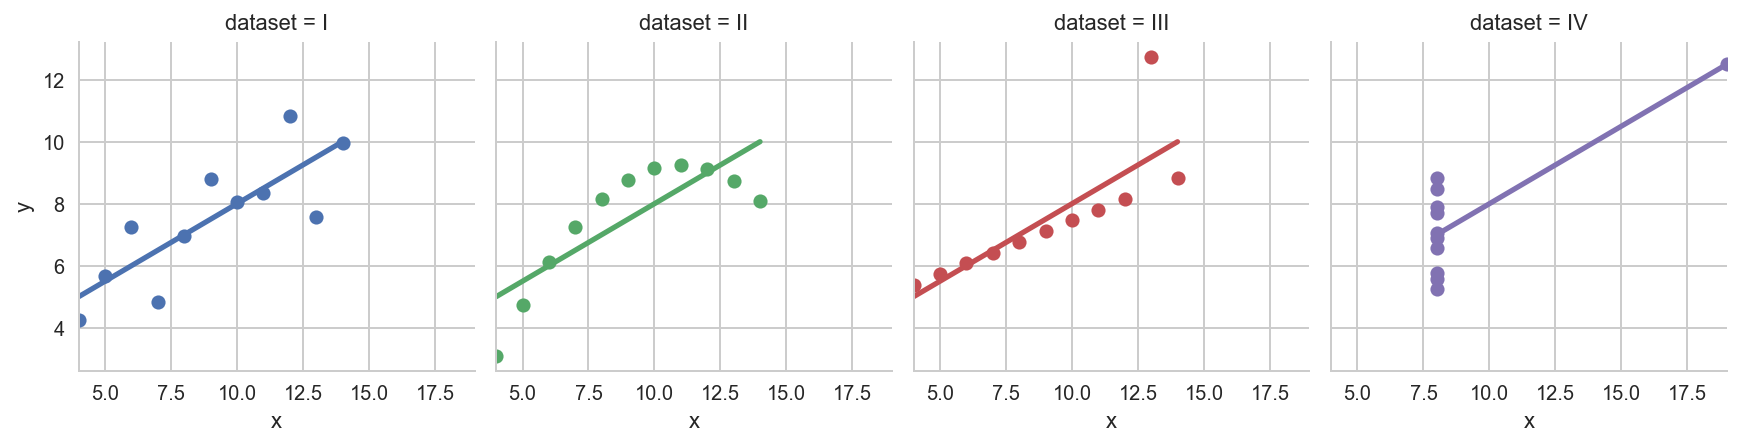

In [7]:
dfAnscombe = sns.load_dataset('anscombe')

sns.lmplot(
    data=dfAnscombe,
    x='x', y='y',
    col='dataset', hue='dataset',
    ci=False, height=3,
    scatter_kws={'s': 50, 'alpha': 1})
plt.show()

## 1.2. Colors

### Built-in Matplotlib colors
Some highly recommended colors are:
<code style='font-size:13px;'>dimgrey</code>
<code style='font-size:13px;'>indianred</code>
<code style='font-size:13px;'>tomato</code>
<code style='font-size:13px;'>goldenrod</code>
<code style='font-size:13px;'>seagreen</code>
<code style='font-size:13px;'>teal</code>
<code style='font-size:13px;'>darkturquoise</code>
<code style='font-size:13px;'>darkslategrey</code>
<code style='font-size:13px;'>slategrey</code>
<code style='font-size:13px;'>royalblue</code>
<code style='font-size:13px;'>rebeccapurple</code>.

<img src='image/matplotlib_color_names.png' style='height:700px; margin:20px auto;'>

### More colors

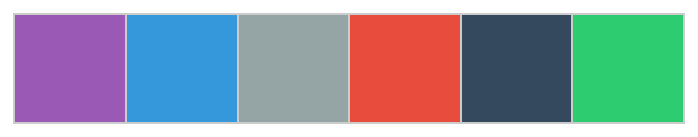

In [8]:
colors = ["#9B59B6", "#3498DB", "#95A5A6", "#E74C3C", "#34495E", "#2ECC71"]
sns.palplot(sns.color_palette(colors))

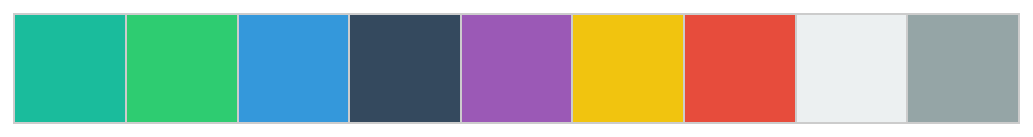

In [9]:
colors = ["#1ABC9C", "#2ECC71", "#3498DB", "#34495E", "#9B59B6", "#F1C40F", "#E74C3C", "#ECF0F1", "#95A5A6"]
sns.palplot(sns.color_palette(colors))

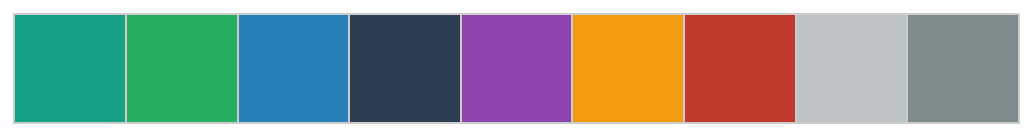

In [10]:
colors = ["#16A085", "#27AE60", "#2980B9", "#2C3E50", "#8E44AD", "#F39C12", "#C0392B", "#BDC3C7", "#7F8C8D"]
sns.palplot(sns.color_palette(colors))

## 1.3. Scales of measurement
Measurement |Type        |Order    |Subtract |Divide   |Example|
:-----------|:-----------|:-------:|:-------:|:-------:|:----|
**Nominal** |Qualitative |         |         |         |Fruits, Gender, Names|
**Ordinal** |Qualitative |&check;  |         |         |Medals, Satisfaction, Age ranges|
**Interval**|Quantitative|&check;  |&check;  |         |Date, Temperature, Scores|
**Ratio**   |Quantitative|&check;  |&check;  |&check;  |Weight, Height, Time period|

More explanation for [scales of measurement](https://en.wikipedia.org/wiki/Level_of_measurement):
- Ratio is characterized by an absolute zero, which represents the absence of the property being measured. For example: the amount of money can be $0.
- Interval can be subtracted, but you cannot do division on it. For example: 6h00, 12h00 and 18h00 are equally spaced; but saying 12h00 is twice as much as 6h00 doesn't make sense.
- Ordinal can be numbers, for example: to measure satisfaction, you are asked to rate from 1 (very disappointed) from 5 (very pleasant).

In Data Visualization, the three popular data types are *Categorical* (nominal and ordinal), *Date/Time* (interval) and *Value* (ratio).

# 2. Basic charts
Basic charts are simple and easy-to-read, and are very good at reporting. In this section, we focus on analyzing how many dimensions a chart can display.

## 2.1. Pie Chart
[Pie Charts](https://en.wikipedia.org/wiki/Pie_chart) show the percentage represented by each category. This type of chart is rarely used in analytics; however, they can vary chart shapes in your reports/dashboards. Pie Charts can display 2 variables:

|Dimension|Data type  |
|:--------|:----------|
|$x$-axis |Categorical|
|$y$-axis |Value      |

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [12]:
dfWorld = pd.read_csv('data/gapminder.csv')
dfWorld = dfWorld[dfWorld.continent != 'Oceania']
dfWorld.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [13]:
def PieChart(data, x, y, agg=np.sum):    
    data = data.groupby(x)[y].agg(agg).reset_index()    
    plt.figure(figsize=(5,5))
    plt.pie(data[y], labels=data[x], autopct='{:.2f}%'.format)
    plt.show()

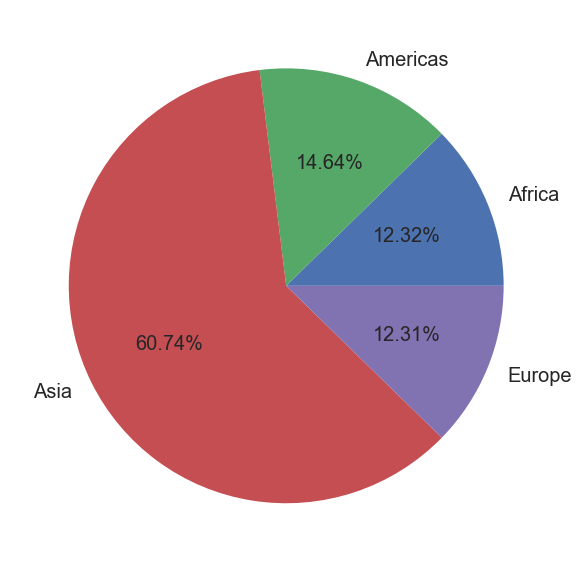

In [14]:
PieChart(dfWorld, x='continent', y='pop')

### Pie matrix

In [15]:
dfWorld = pd.read_csv('data/gapminder.csv')
dfWorld = dfWorld[dfWorld.continent != 'Oceania']
dfWorld.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


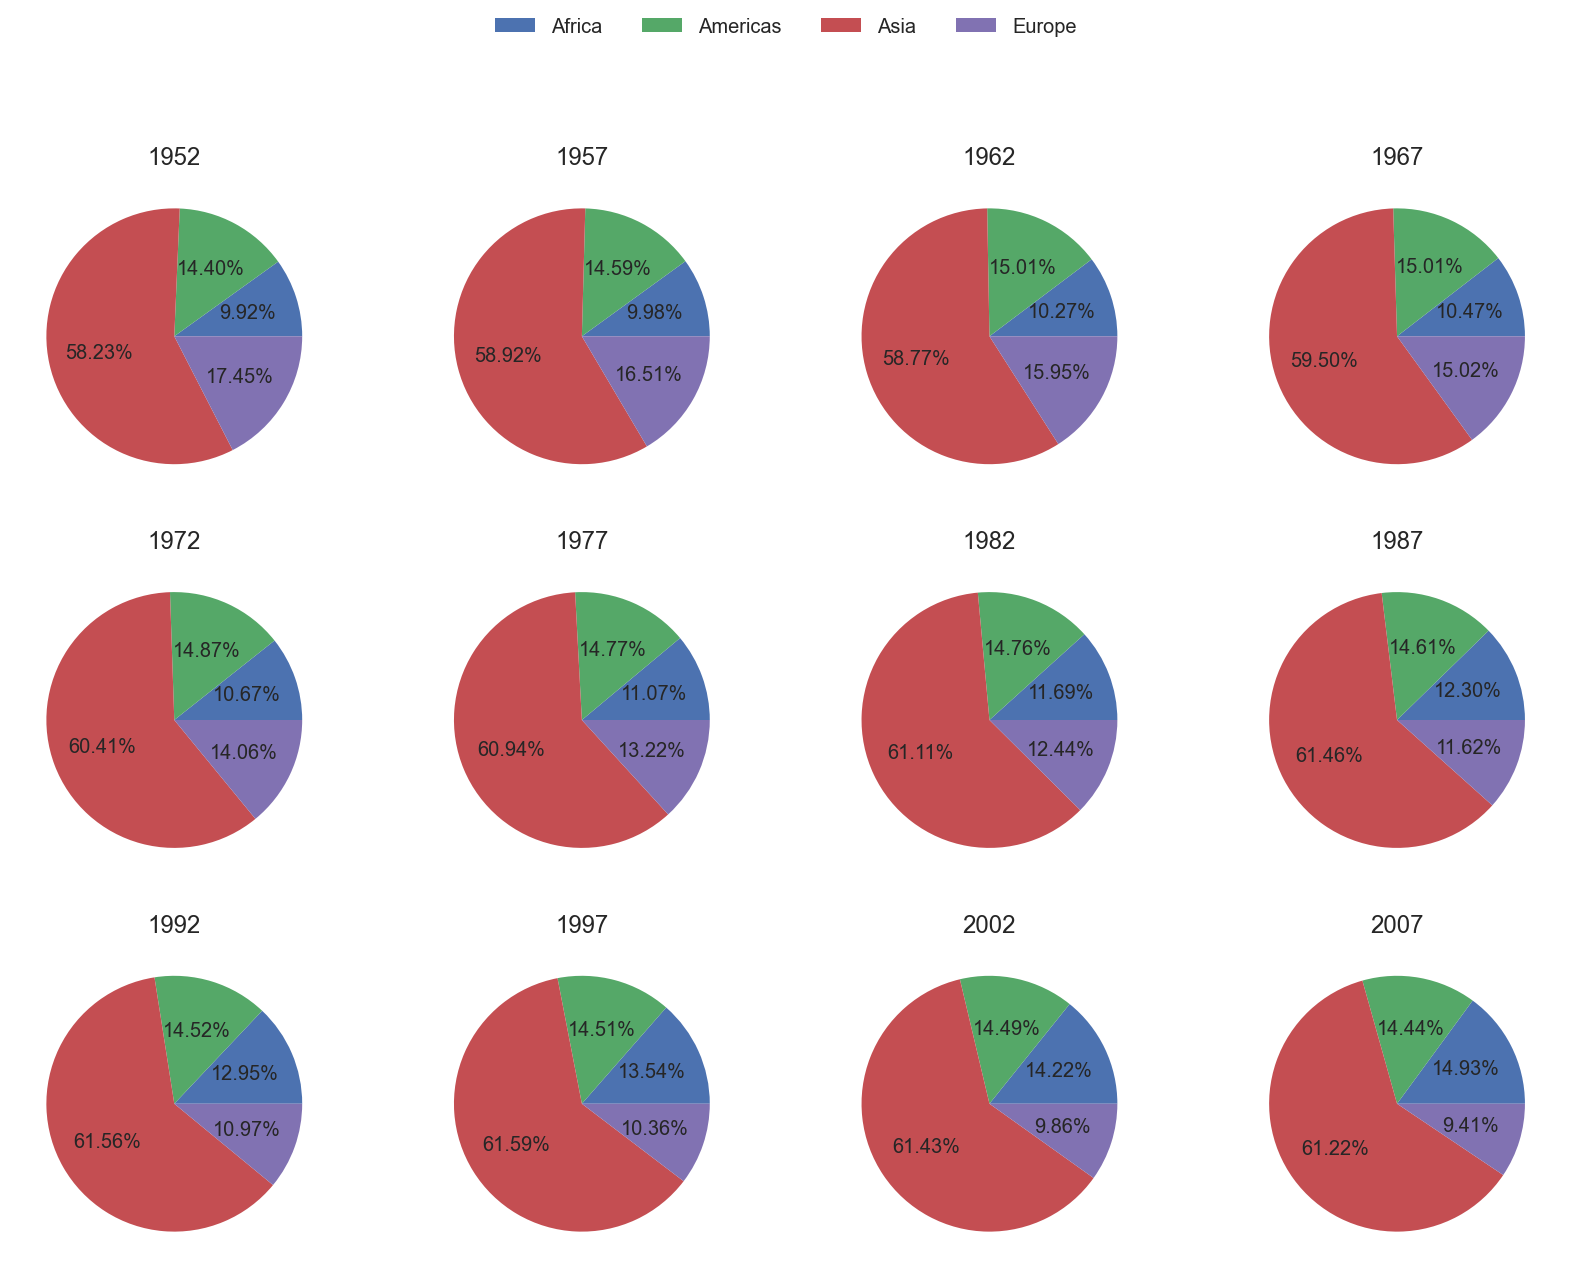

In [16]:
df = dfWorld.pivot_table(index='continent', columns='year', values='pop', aggfunc=np.sum)

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(14,10))
for ax, col in zip(axes.flat, df.columns):
    ax.pie(df[col], autopct='{:.2f}%'.format)
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(labels=df.index, loc='upper center', ncol=4)
plt.axis('off')

plt.show()

## 2.2. Line Chart
[Line Charts](https://en.wikipedia.org/wiki/Line_chart) are usually used with time series data thanks to the ability of emphasizing fluctuations, trends, and cycles. Line Charts can display 3 variables:

|Dimension|Data type  |
|:--------|:----------|
|$x$-axis |Date       |
|$y$-axis |Value      |
|Color    |Categorical|

The $x$-axis of Line Charts cannot be a Categorical variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [14]:
dfTemp = pd.read_csv('data/temperatures.csv')
dfTemp = dfTemp.astype({'date': 'datetime64'})
dfTemp = dfTemp.sort_values(['city', 'date'])
dfTemp['smooth_temp'] = dfTemp.groupby('city')['temperature'].rolling(window=7, center=True).mean().values
dfTemp.head()

,date,city,temperature,smooth_temp
2,2011-10-01,Austin,72.2,NaN
5,2011-10-02,Austin,67.7,NaN
8,2011-10-03,Austin,69.4,NaN
11,2011-10-04,Austin,68.0,72.714286
14,2011-10-05,Austin,72.4,73.671429


In [3]:
def LineChart(data, x, y, c=None, agg=np.sum, width=15, height=5):
    plt.figure(figsize=(width, height))
    sns.lineplot(data=data, x=x, y=y, hue=c, estimator=agg, linewidth=1.5)
    plt.show()

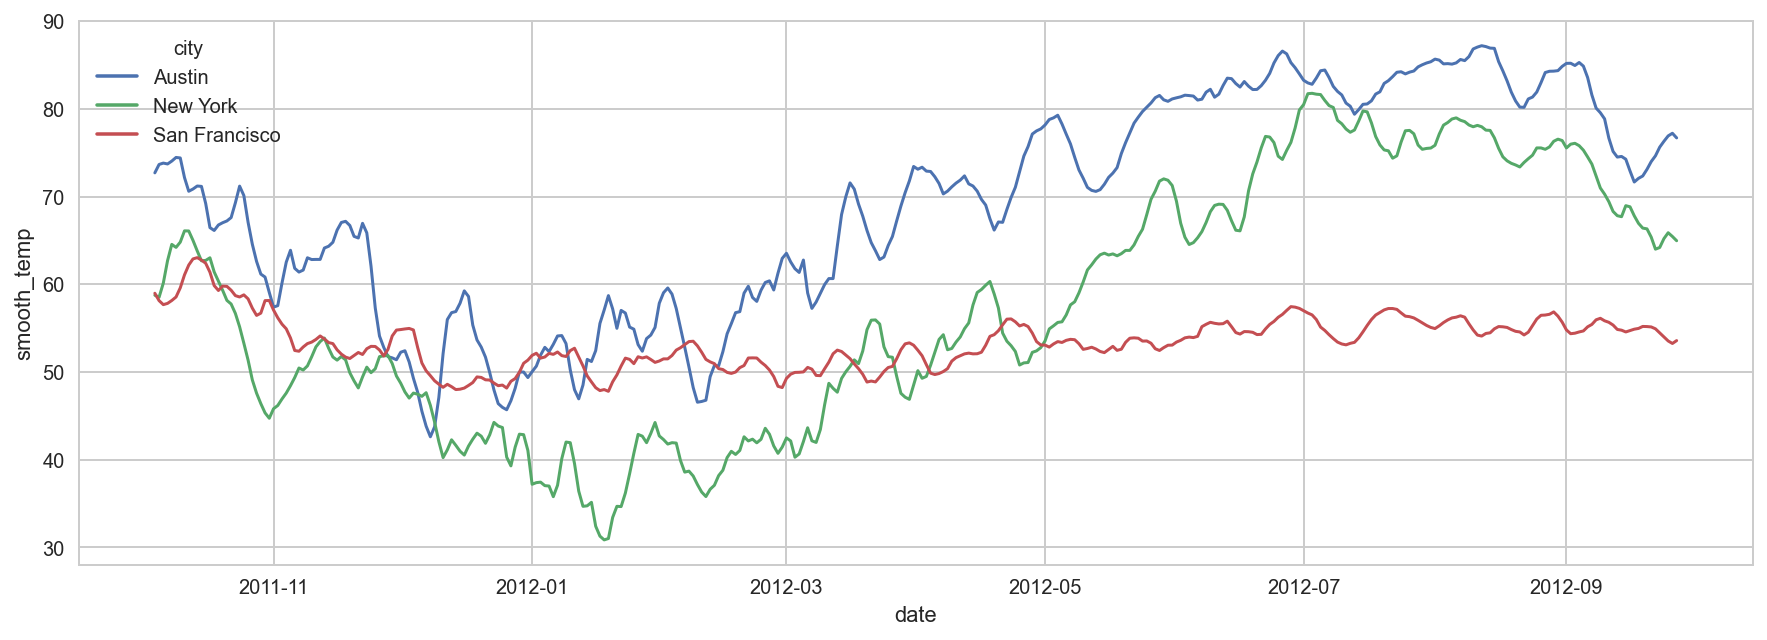

In [15]:
LineChart(data=dfTemp, x='date', y='smooth_temp', c='city', agg=np.median)

## 2.3. Bar Chart
[Bar Charts](https://en.wikipedia.org/wiki/Bar_chart) have some variants: Group, Stack and Percent. They are very helpful in comparison, which requires the $y$-axis to start from 0. Bar Charts can display 3 variables:

|Dimension|Data type        |
|:--------|:----------------|
|$x$-axis |Categorical, Date|
|$y$-axis |Value            |
|Color    |Categorical      |

Bar Charts should not be used on time series data such as temperatures and prices.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [22]:
dfSales = pd.read_csv('data/supermarket_sales.csv')
dfSales.head()

,invoice_id,brand,city,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cost,gross_margin_percentage,profit,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [23]:
def BarChart(data, x, y, c, agg=np.sum, mode='group', orient='vertical', width=9, height=6):
    
    if mode == 'group':
        if orient.startswith('v'):
            plt.figure(figsize=(width, height))
            sns.barplot(data=data, x=x, y=y, hue=c, estimator=agg, ci=False)
            plt.show()
        if orient.startswith('h'):
            plt.figure(figsize=(width, height))
            sns.barplot(data=data, x=y, y=x, hue=c, estimator=agg, ci=False, orient='h')
            plt.show()
        
    if mode == 'stack':
        data = data.pivot_table(index=x, columns=c, values=y, aggfunc=agg)
        if orient.startswith('v'):
            data.plot.bar(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()
        if orient.startswith('h'):
            data.plot.barh(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()
            
    if mode == 'percent':
        data = data.pivot_table(index=x, columns=c, values=y, aggfunc=agg)
        data = data.div(data.sum(1), axis=0)
        if orient.startswith('v'):
            data.plot.bar(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()
        if orient.startswith('h'):
            data.plot.barh(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()

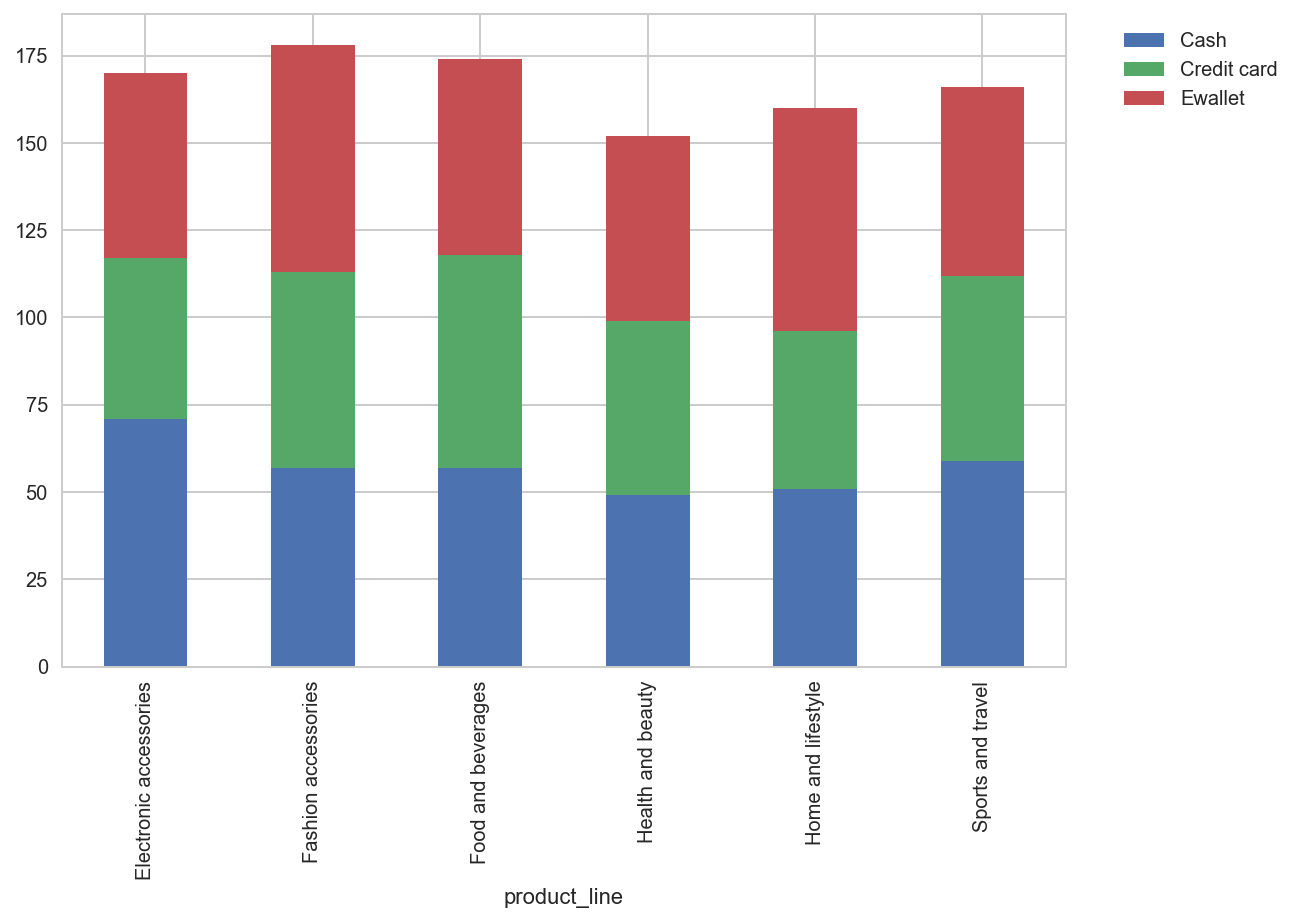

In [24]:
BarChart(data=dfSales, x='product_line', y='profit', c='payment', mode='stack', orient='v', agg=np.size)

## 2.4. Area Chart
[Area Charts](https://en.wikipedia.org/wiki/Area_chart) are similar to Stack Bar Charts, and they work well on time series data. Area Charts can display 3 variables:

|Dimension|Data type        |
|:--------|:----------------|
|$x$-axis |Categorical, Date|
|$y$-axis |Value            |
|Color    |Categorical      |

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [26]:
dfWorld = pd.read_csv('data/gapminder.csv')
dfWorld = dfWorld[dfWorld.continent != 'Oceania']
dfWorld['gdp'] = dfWorld['pop'] * dfWorld['gdpPercap']
dfWorld.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,9.678553e+09


In [27]:
def AreaChart(data, x, y, c, agg=np.sum, mode='stack', width=9, height=6):
    data = data.pivot_table(index=x, columns=c, values=y, aggfunc=agg)
    
    if mode == 'stack':
        data.plot.area(stacked=True, figsize=(width, height))
        plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title=c)
        plt.ylabel(y)
        plt.show()
        
    if mode == 'percent':
        data = data.div(data.sum(1), axis=0)
        data.plot.area(stacked=True, figsize=(width, height))
        plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title=c)
        plt.ylabel(y)
        plt.show()

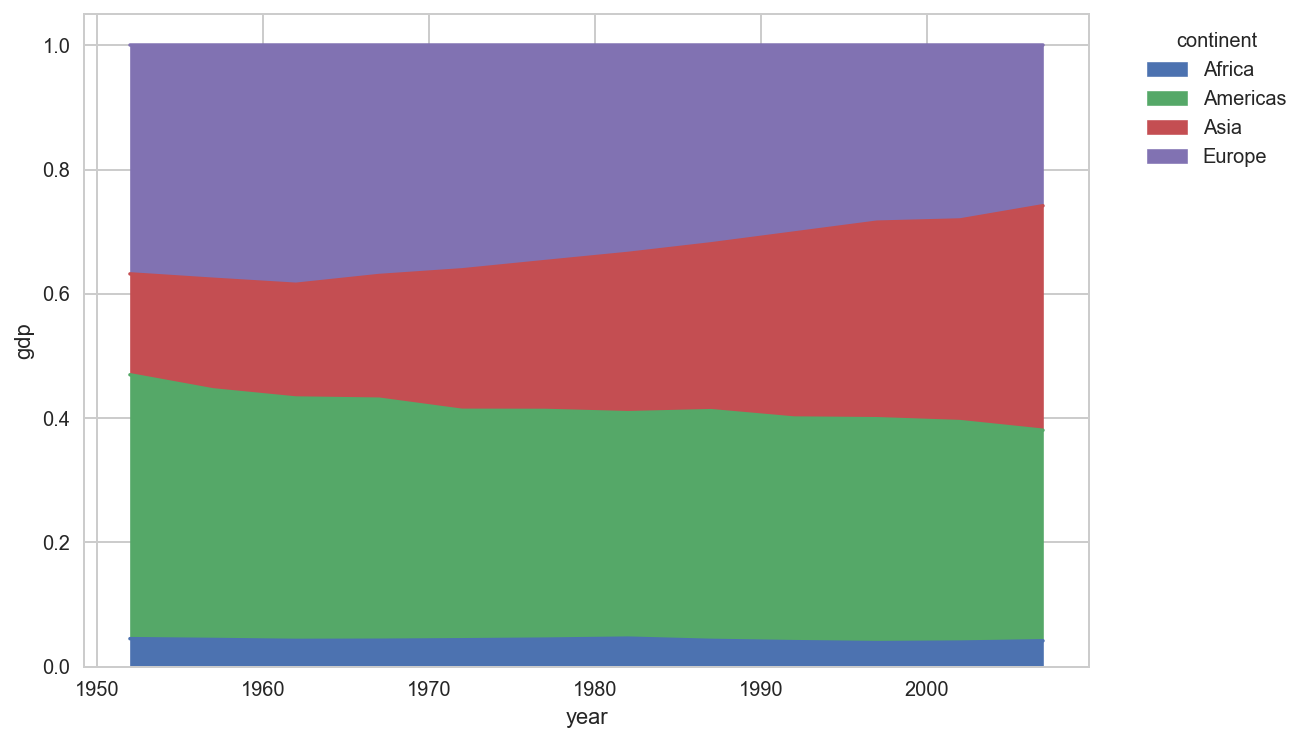

In [28]:
AreaChart(data=dfWorld, x='year', y='gdp', c='continent', mode='percent')

## 2.5. Scatter Plot
[Scatter Plots](https://en.wikipedia.org/wiki/Scatter_plot) are used to visualize the distribution and relationship of two variables. Scatter Plots can display 4 variables:

|Dimension|Data type         |
|:--------|:-----------------|
|$x$-axis   |Categorical, Value|
|$y$-axis   |Categorical, Value|
|Color    |Categorical       |
|Size     |Categorical, Value|

Sometimes, letting both color and size represent a single variable is better since differences are emphasized. If a categorical variable is assigned to one of the two axes, a variant of Scatter Plot called Swarm Plot may be the better choice.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [30]:
dfCar = pd.read_csv('data/cars.csv')
dfCar.head()

,manufacturer,model,type,min_price,price,max_price,mpg_city,mpg_highway,airbags,drive_train,...,passengers,length,wheelbase,width,turn_circle,rear_seat_room,luggage_room,weight,origin,make
0,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
1,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
2,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,...,4,193,101,74,43,25.0,13.0,3240,USA,Chevrolet Camaro
3,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV


In [31]:
def ScatterPlot(data, x, y, c=None, s=None, agg=np.sum, opacity=0.8, width=10, height=5):
    plt.figure(figsize=(width, height))
    sns.scatterplot(data=data, x=x, y=y, hue=c, size=s, s=100, alpha=opacity, sizes=(100,1000))

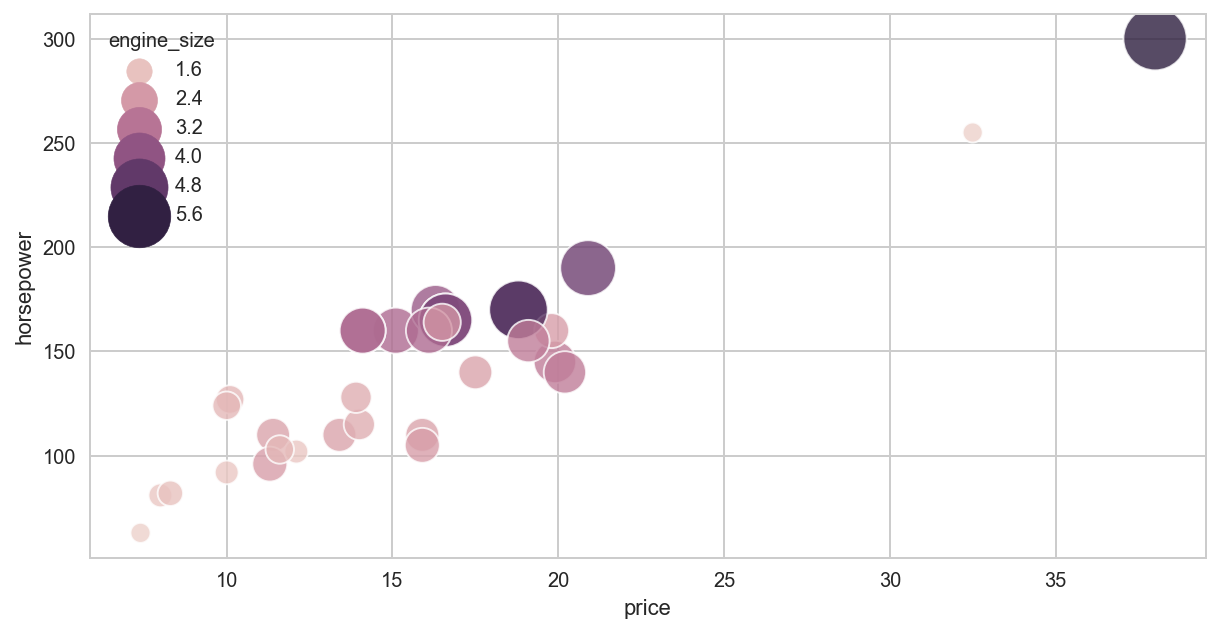

In [32]:
ScatterPlot(data=dfCar, x='price', y='horsepower', c='engine_size', s='engine_size')

### Swarm Plot
Swarm Plot is the non-overlap version of Scatter Plot. When either $x$-axis or $y$-axis is a categorical variable or when the dataset is very large, Swarm Plot may be more useful than original Scatter Plot.

In [33]:
dfIris = sns.load_dataset('iris')
dfIris = pd.melt(dfIris, 'species', var_name='measurement')
dfIris.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


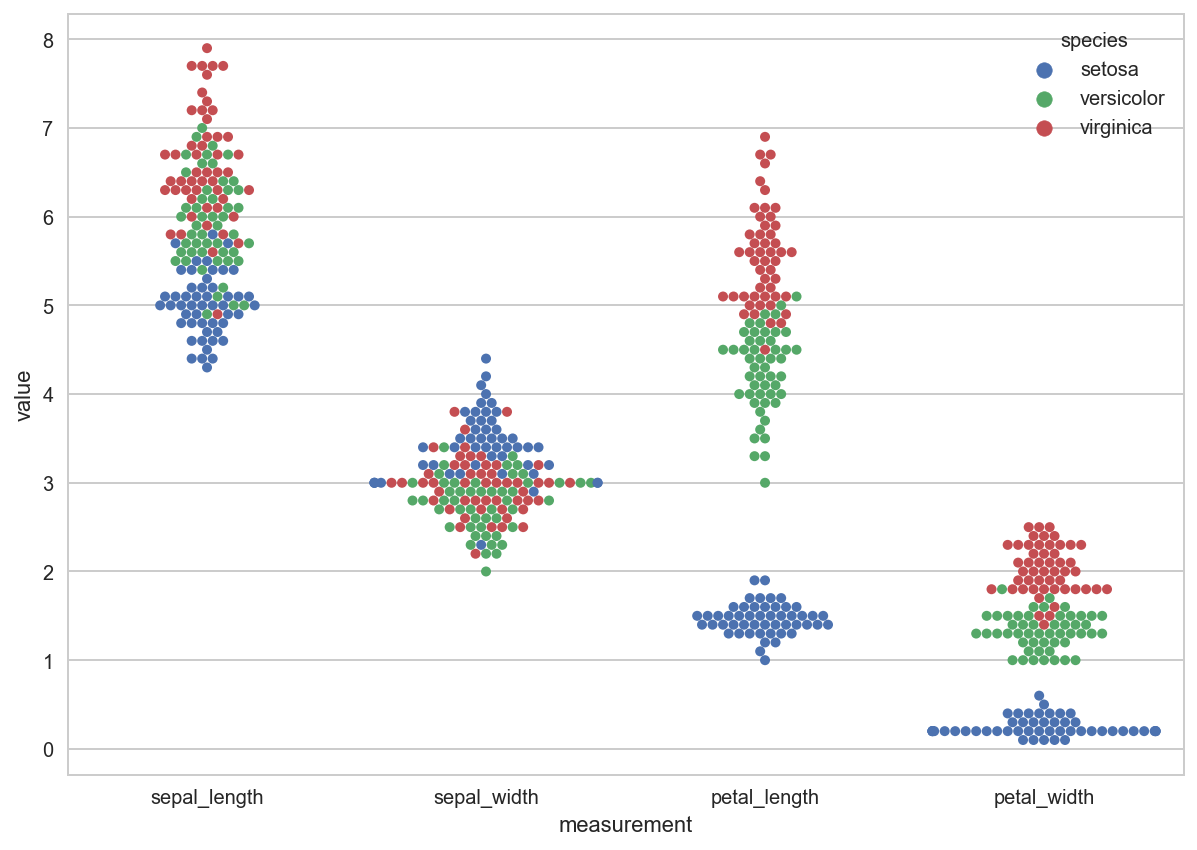

In [34]:
plt.figure(figsize=(10,7))
sns.swarmplot(data=dfIris, x='measurement', y='value', hue='species')
plt.show()

# 3. Statistical charts
Statistical charts do not focus on the number of dimensions, but they give Data Scientists a very deep understanding of the data. Statistical charts require good analytical skills to read, and are widely used in data analytics.

## 3.1. Heat Map
[Heat Maps](https://en.wikipedia.org/wiki/Heat_map) highlight values (large or small, negative or positive). Although Heat Maps are very simple, they usually go with a statistical table such as *correlation matrix* or *pivot table* and become very powerful in summarizing data. Depend on the value range, either a *sequential palette* or a *diverging palette* may be suitable.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [36]:
dfCar = pd.read_csv('data/cars.csv')
dfCar.head()

,manufacturer,model,type,min_price,price,max_price,mpg_city,mpg_highway,airbags,drive_train,...,passengers,length,wheelbase,width,turn_circle,rear_seat_room,luggage_room,weight,origin,make
0,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
1,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
2,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,...,4,193,101,74,43,25.0,13.0,3240,USA,Chevrolet Camaro
3,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV


### Correlation matrix
The correlation coefficient of each variable pair is:

$$
\rho_{\mathbf{x},\mathbf{y}} =
\frac{1}{N} \sum_{n=1}^{N}{\frac{(x_n-\mu_{\mathbf{x}})(y_n-\mu_{\mathbf{y}})}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}}
$$

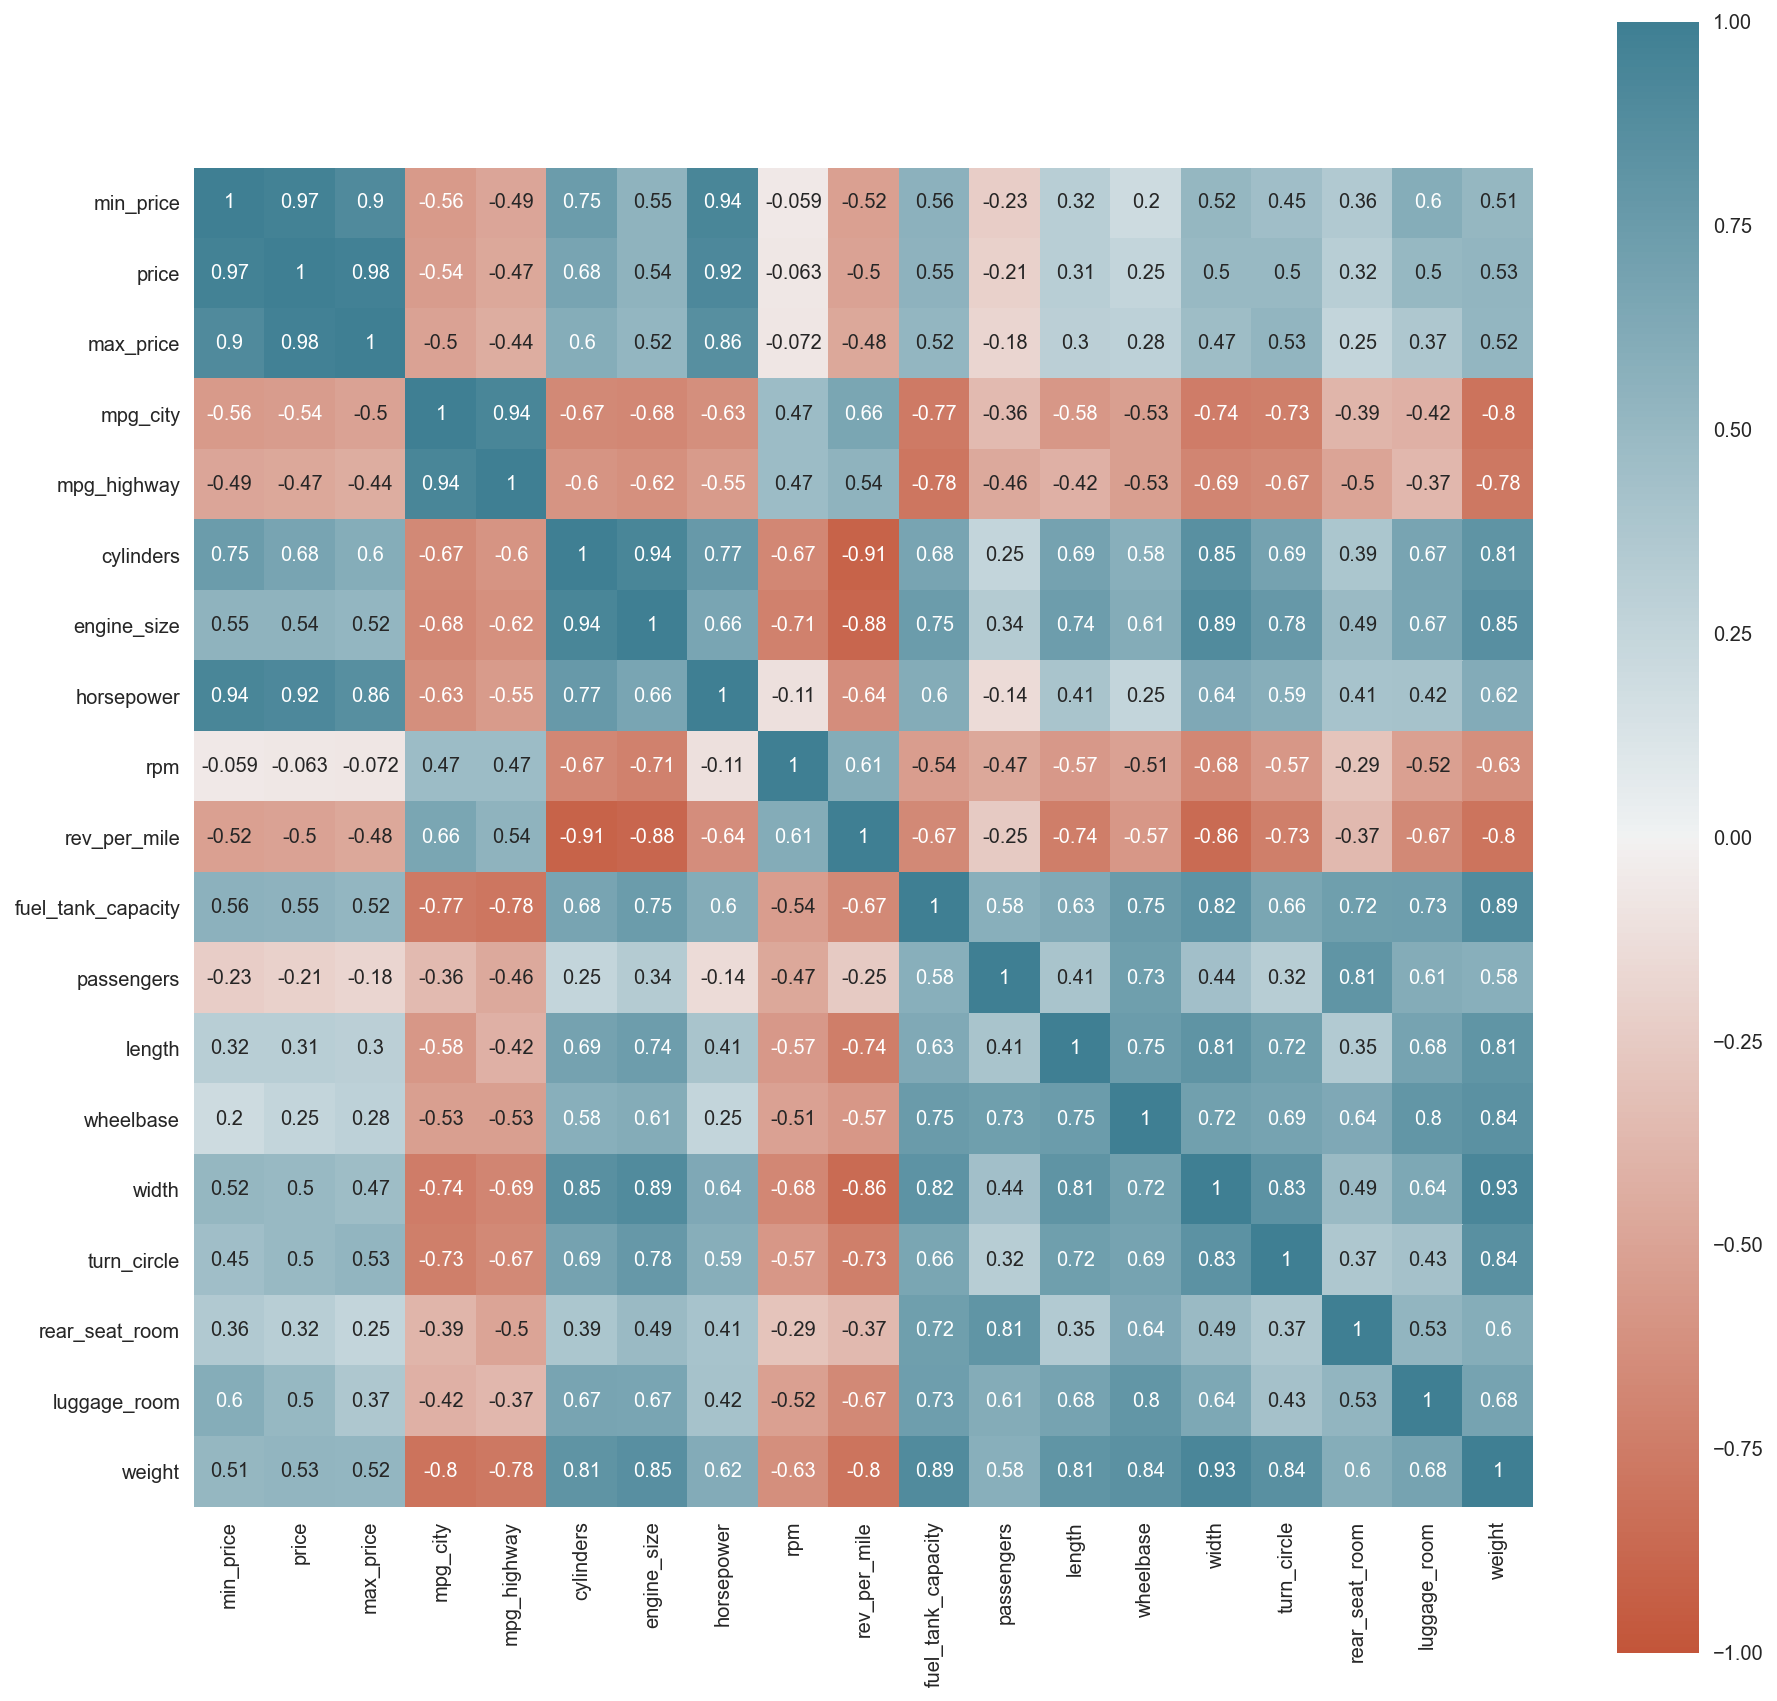

In [37]:
palette = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(15,15))
sns.heatmap(
    dfCar.corr(), square=True, annot=True,
    cmap=palette,
    vmin=-1, vmax=1,
)
plt.show()

# linecolor='white'
# linewidth=0.1

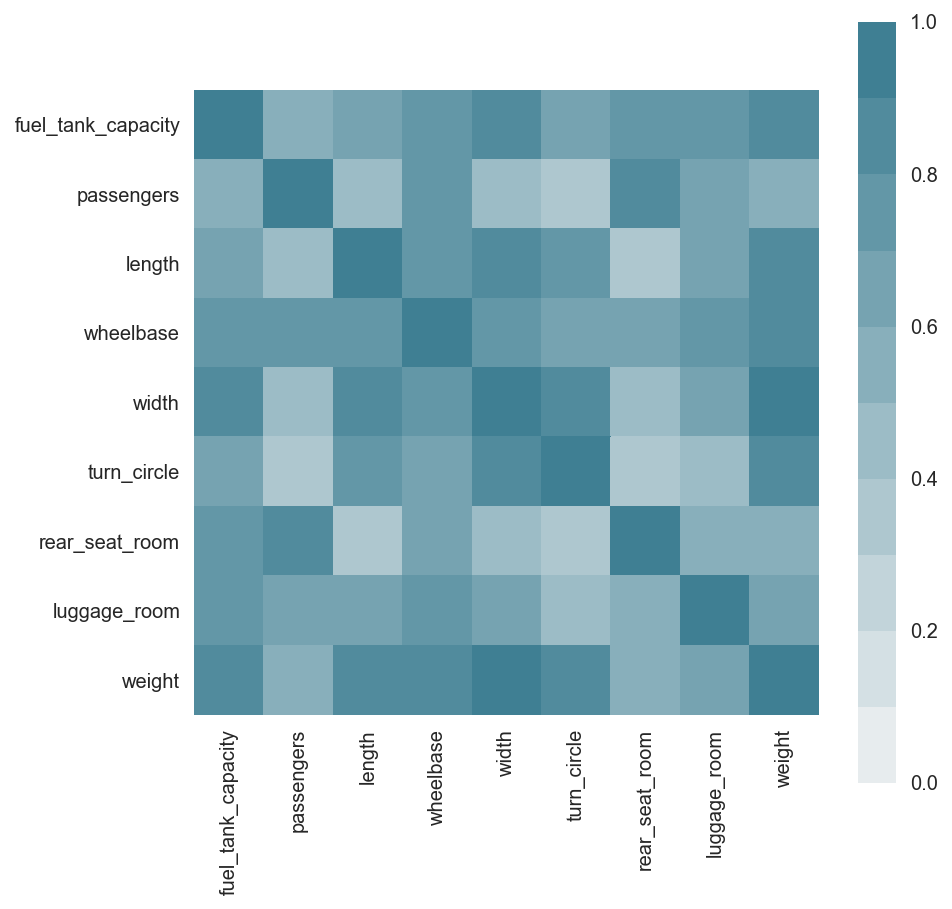

In [38]:
subset = [
    'fuel_tank_capacity', 'passengers', 'length', 'wheelbase', 'width',
    'turn_circle', 'rear_seat_room', 'luggage_room', 'weight'
]

palette = sns.diverging_palette(20, 220, n=20)[10:]

plt.figure(figsize=(7,7))
sns.heatmap(
    dfCar[subset].corr(), square=True,
    cmap=palette,
    vmin=0, vmax=1,
)
plt.show()

### Data summarizing

In [39]:
dfCar.head()

,manufacturer,model,type,min_price,price,max_price,mpg_city,mpg_highway,airbags,drive_train,...,passengers,length,wheelbase,width,turn_circle,rear_seat_room,luggage_room,weight,origin,make
0,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
1,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
2,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,...,4,193,101,74,43,25.0,13.0,3240,USA,Chevrolet Camaro
3,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV


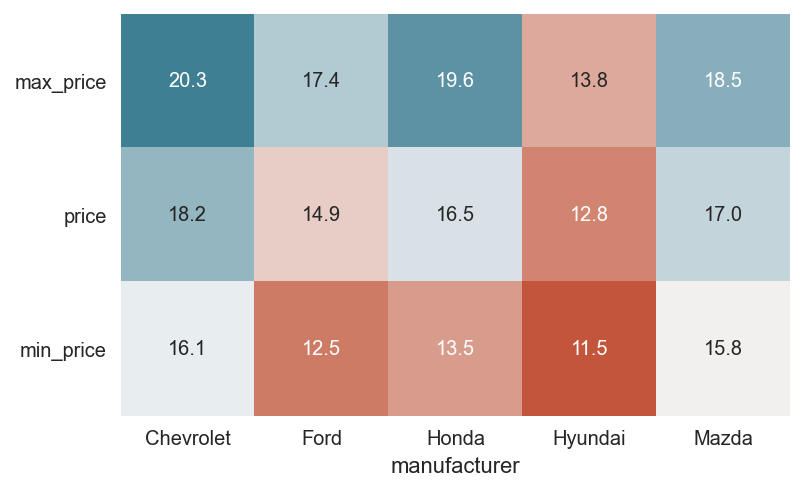

In [40]:
data = dfCar.groupby('manufacturer').mean()[['max_price', 'price', 'min_price']].T
palette = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(6,6))
g = sns.heatmap(
    data, square=True, annot=True,
    cmap=palette, cbar=False, fmt='.1f'
)
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.show()

## 3.2. Histogram
A [Histogram](https://en.wikipedia.org/wiki/Histogram) represents the distribution of a numerical variable. It counts how many observations fall into each bin (which is a range of values) and displays each bin as a bar. Notice that Histograms look similar to Bar Charts, but they deliver completely different information.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Basic Histogram
Given the vector $\mathbf{x}$ of $N$ observations, we can easily calculate the IQR (**I**nter**Q**uartile **R**ange). The suggested width of each bin $h$ is calculated using the Freedman-Diaconis's formula:

$$h = \frac{2\cdot\mbox{IQR}}{\sqrt[3]{N}}$$

The number of bins $k$ is:
$$k = \biggl\lceil \frac{\mathbf{x}_{max}-\mathbf{x}_{min}}{h} \biggr\rceil $$

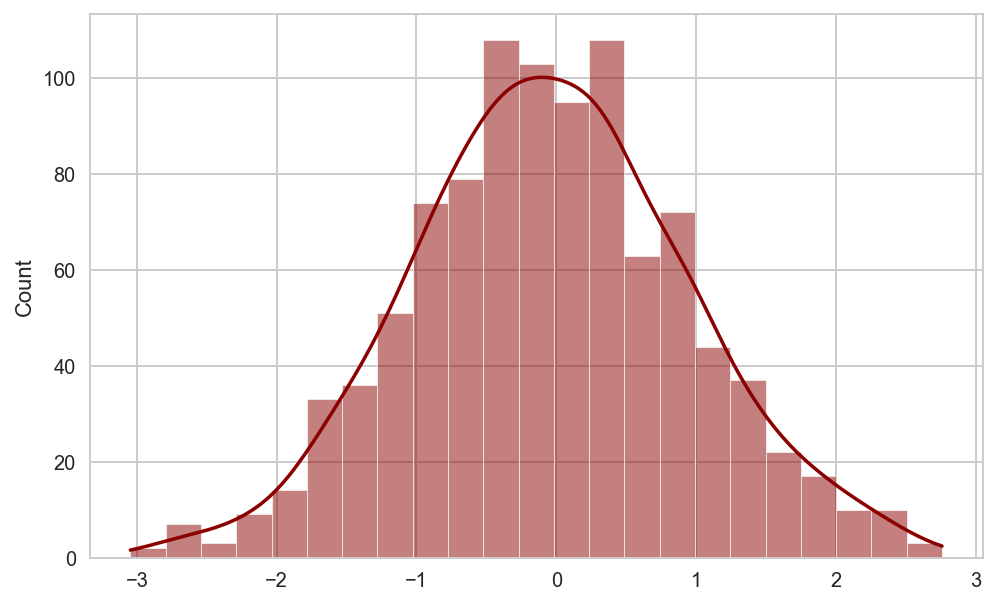

In [42]:
np.random.seed(0)
x = np.random.normal(size=1000)

plt.figure(figsize=(8,5))
sns.histplot(x, color='darkred', kde=True, stat='count', edgecolor='w')
plt.show()

### Kernel density estimation
[**K**ernel **D**ensity **E**stimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) is a method to estimate the [**P**robability **D**ensity **F**unction](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) of the sample. The approach of this method is to create a [kernel function](https://en.wikipedia.org/wiki/Kernel_(statistics)) $\kappa(x_n)$ for every observation. $\kappa(x_n)$ uses a parameter - bandwidth, denoted $h$ that needs to be optimized. Seaborn uses the Gaussian kernel, which has the equation:

$$\kappa(x) = \frac{1}{h\sqrt{2\pi}} \exp \left(-\frac{(x-x_n)^2}{2h^2}\right) $$

Now we are having $n$ kernels, each one is a normal distribution with the standard deviation $\sigma = h$ and the mean $\mu = x_n$. The KDE is obtained by adding up all kernels, notice that each kernel has the area of 1. The sum is then normalized by dividing $N$, explaining why the KDE has the total area of 1.

$$\mbox{KDE}(\mathbf{x}) = \frac{1}{N} \sum_{n=1}^{N}{\kappa(x_n)}$$

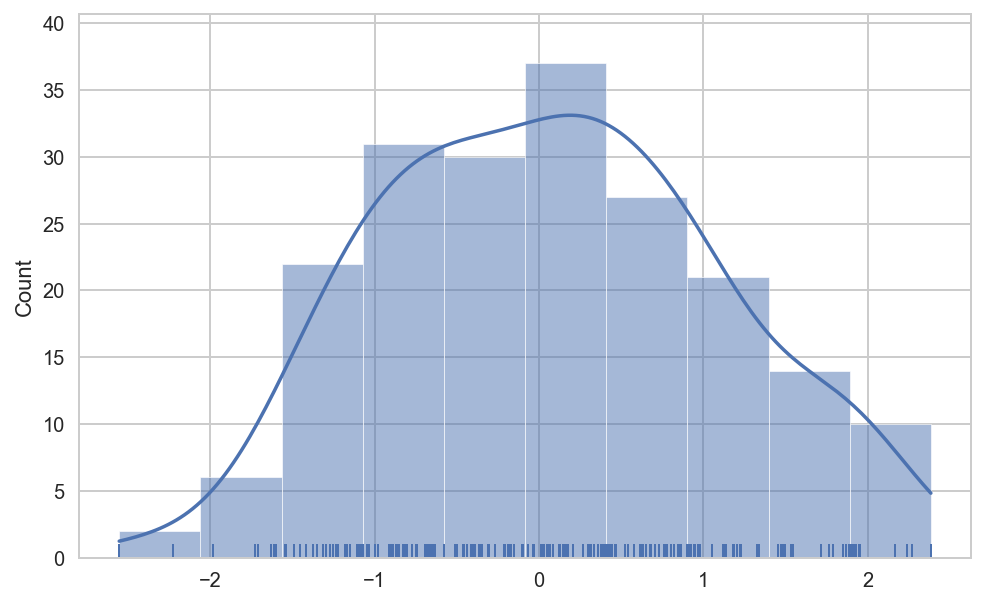

In [43]:
np.random.seed(0)
x = np.random.normal(size=200)

plt.figure(figsize=(8,5))
sns.histplot(x, kde=True, stat='count', edgecolor='w')
sns.rugplot(x)
plt.show()

### Bivariate Histogram
You can place in each of the axes a single variable, then draw Histogram or a KDE to show how it is distributed. For displaying bivariate distribution, there are a couple of choices: Scatter Plot (with the linear regression line), Hexbin Plot and Heat Map.

In [44]:
dfTip = sns.load_dataset('tips')
dfTip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


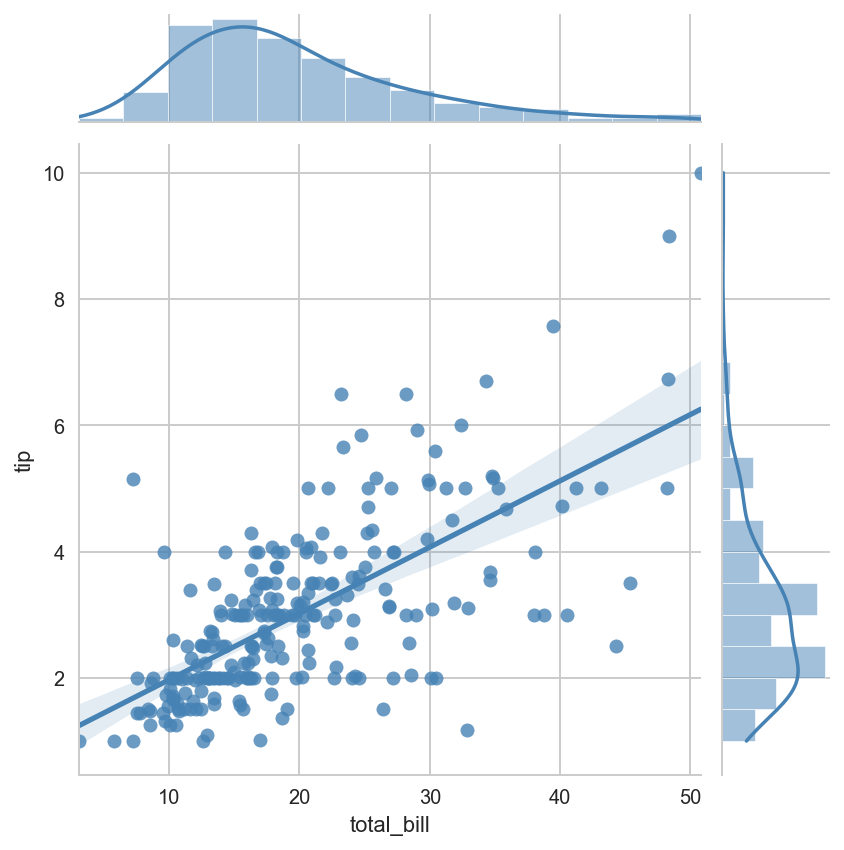

In [45]:
sns.jointplot(data=dfTip, x='total_bill', y='tip', kind='reg', color='steelblue', marginal_kws={'edgecolor':'w'})
plt.show()

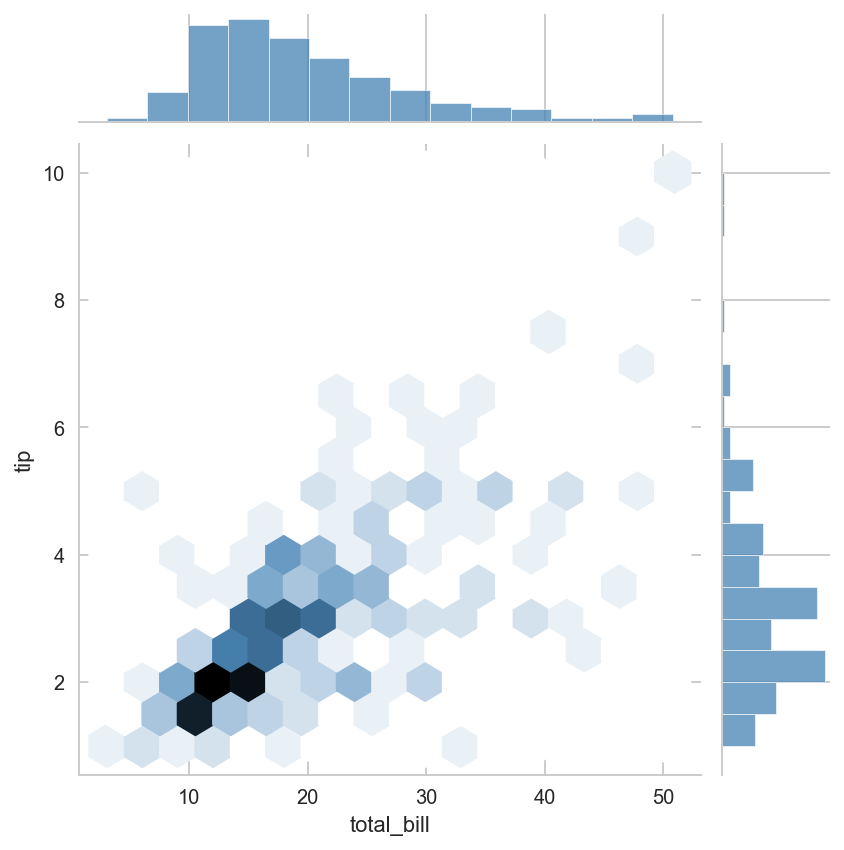

In [46]:
sns.jointplot(data=dfTip, x='total_bill', y='tip', kind='hex', color='steelblue', marginal_kws={'edgecolor':'w'})
plt.show()

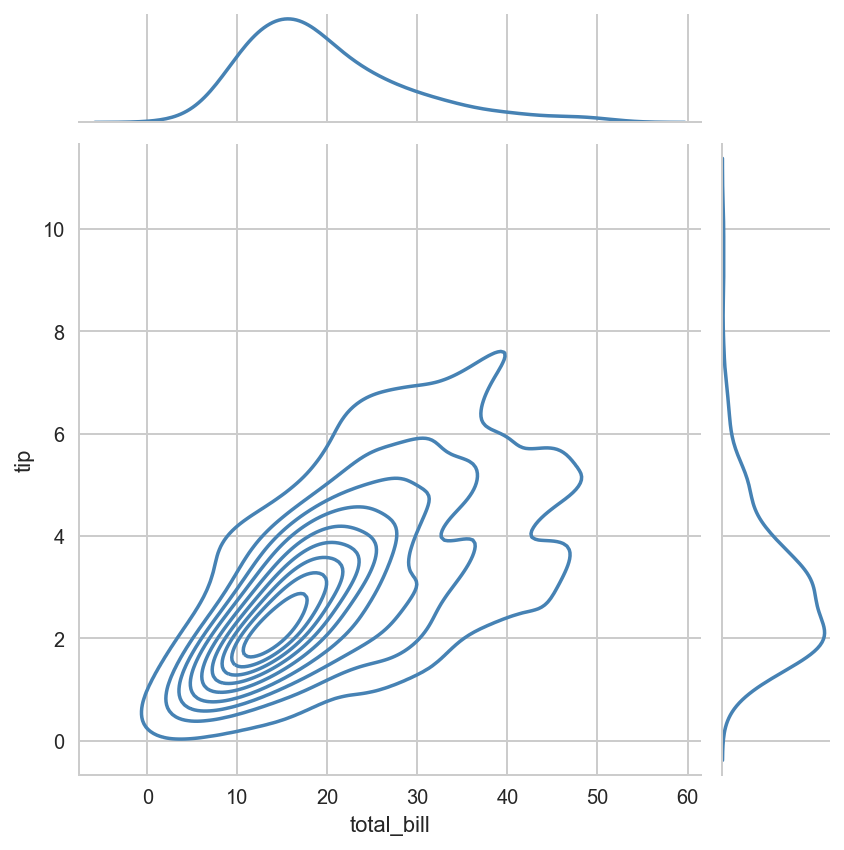

In [47]:
sns.jointplot(data=dfTip, x='total_bill', y='tip', kind='kde', color='steelblue')
plt.show()

## 3.3. Box Plot
[Box Plots](https://en.wikipedia.org/wiki/Box_plot) are less detailed than Histograms, but they have the ability to emphasize quartiles and outliers.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Basic Box Plot
Describing a Box Plot:
- The box visualizes the 3 quartiles: $Q_1$, $Q_2$, $Q_3$ as well as the midrange which includes 50% of the data.
- The lower bound is the smaller of either $Q_1-1.5\cdot\mbox{IQR}$ or the minimum.
- The upper bound is the greater of either $Q_3+1.5\cdot\mbox{IQR}$ or the maximum.

Here is some useful information that can be read through Box Plots:
- Looking for potential outliers: An outlier is a data point that is located outside the whiskers.
- Signs of skewness: You can easily conclude that the data is left-skewed, right-skewed or symmetric by comparing $Q_2-Q_1$ and $Q_3-Q_2$.
- Examining how spread the data is: The longer the midrange and the length of whiskers, the wider the distribution is.
- Comparing categories: If the median of a category lies outside of the box of another one, then there is likely to be a difference between the two categories.

In [49]:
dfTip = sns.load_dataset('tips')
dfTip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


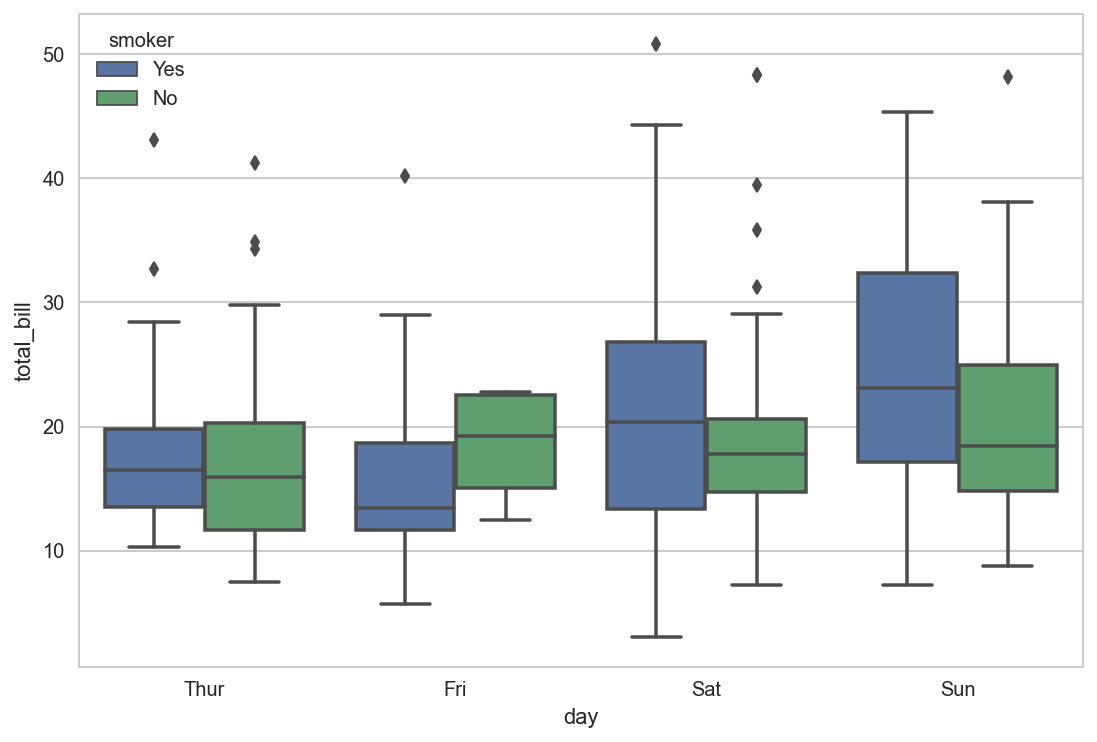

In [50]:
plt.figure(figsize=(9,6))
sns.boxplot(data=dfTip, x='day', y='total_bill', hue='smoker')
plt.show()

### Boxen Plot
[Boxen Plot](http://vita.had.co.nz/papers/letter-value-plot.pdf) (also known as Letter-Value Plot) is an enhanced version of Box Plot. Boxen Plots have more boxes, allow analyzing larger datasets. This method calculating the number of boxes is defined recursively, starting with the median:

$$d_{i+1} = \frac{1+\lfloor d_i \rfloor}{2}$$

where $d_i$ is the depth of each outer group. $d_1$ represents the depth of the median; $d_2$ represents the depth of the 2 quartiles $Q_1$ and $Q_3$.

In [51]:
dfTip = sns.load_dataset('tips')
dfTip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


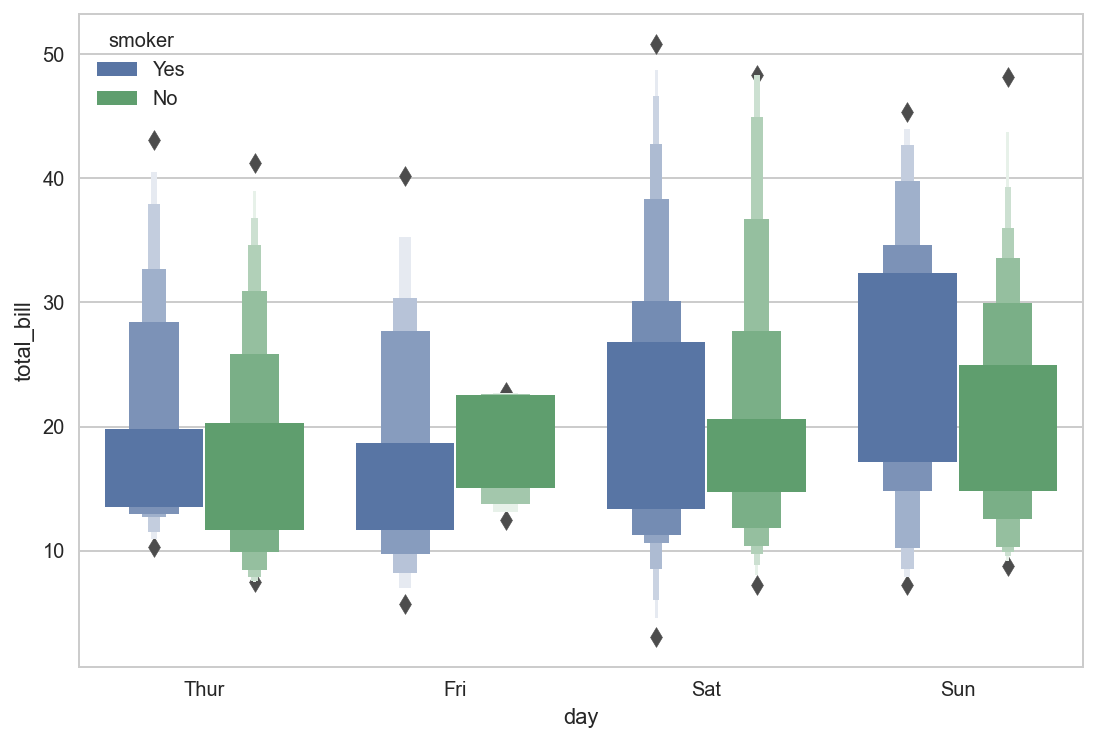

In [52]:
plt.figure(figsize=(9,6))
sns.boxenplot(data=dfTip, x='day', y='total_bill', hue='smoker', k_depth='full', linewidth=0)
plt.show()

# 4. Multivariate visualization

## 4.1. Andrews Curves
The [Andrews Curve](https://en.wikipedia.org/wiki/Andrews_plot) visualizes clusters of high-dimensional data. Each observation (row) $\mathbf{s}=(x_1, x_2, x_3,\dots)$ is transformed into a curve using [Fourier series](https://en.wikipedia.org/wiki/Fourier_series) as follows:

$$f_x(t) = \frac{x_1}{\sqrt2} + x_2\sin(t) + x_3\cos(t) + x_4\sin(2t) + x_5\cos(2t) + \dots$$

The function is then plotted for $t \in [-\pi, \pi]$.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [54]:
dfIris = sns.load_dataset('iris')
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


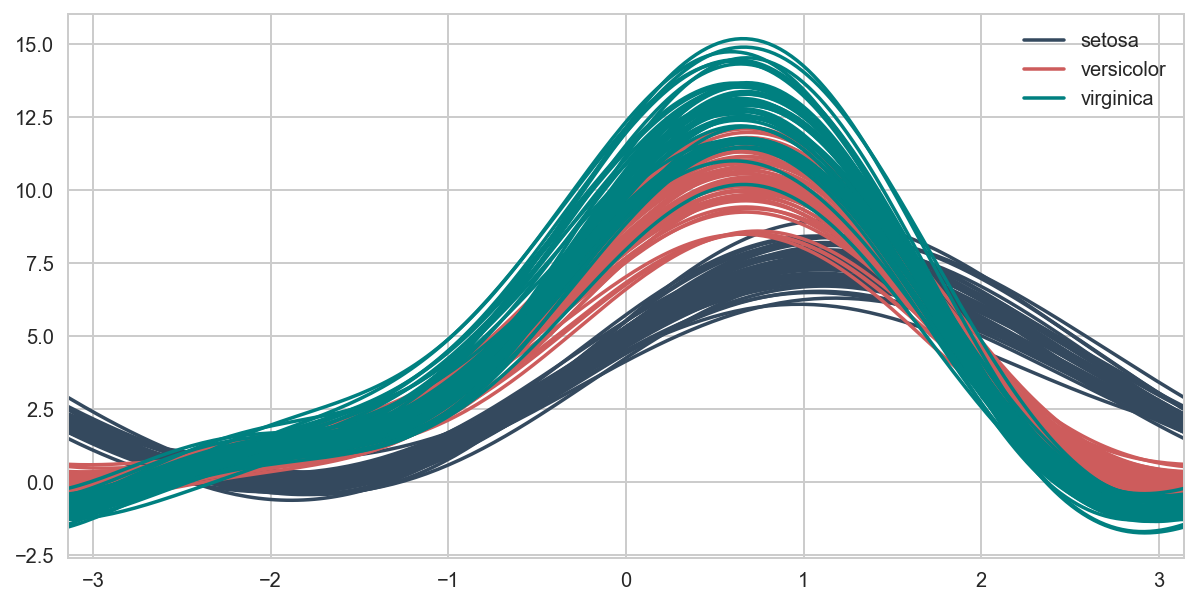

In [55]:
plt.figure(figsize=(10,5))
pd.plotting.andrews_curves(dfIris, 'species', color=['#34495e', 'indianred', 'teal'])
plt.grid()
plt.show()

## 4.2. Parallel Coordinates Plot
In [parallel coordinates](https://en.wikipedia.org/wiki/Parallel_coordinates), each axis represents a single each variable.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [57]:
dfIris = sns.load_dataset('iris')
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


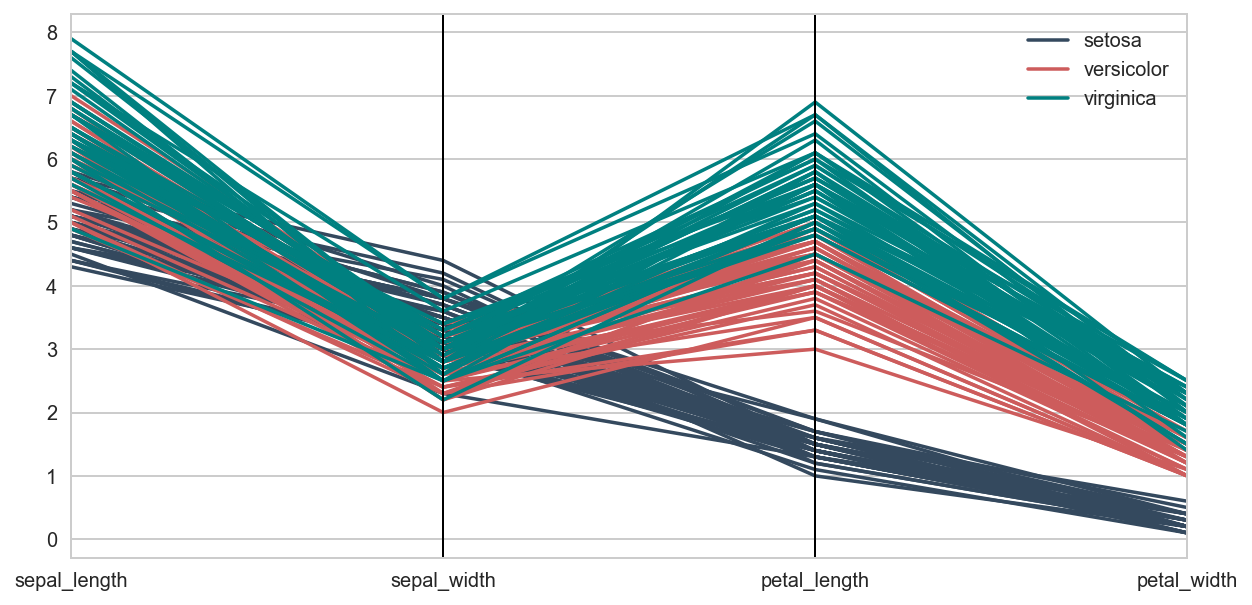

In [58]:
plt.figure(figsize=(10,5))
pd.plotting.parallel_coordinates(dfIris, 'species', color=['#34495e', 'indianred', 'teal'])
plt.grid()
plt.show()

## 4.3. Facet Grid
Facet Grid is a matrix of plots, where each rows and columns correspond to categories of 2 qualitative variables. The Seaborn's <code style='font-size:13px;'>sns.catplot()</code> function creates a Facet Grid which is a matrix of plots and is able to display up to 5 variables. The <code style='font-size:13px;'>kind</code> parameter selects the underlying axes-level visualization to use:
<code style='font-size:13px;'>strip</code> (default)
<code style='font-size:13px;'>swarm</code>
<code style='font-size:13px;'>box</code>
<code style='font-size:13px;'>boxen</code>
<code style='font-size:13px;'>violin</code>
<code style='font-size:13px;'>point</code>
<code style='font-size:13px;'>bar</code>
<code style='font-size:13px;'>count</code>.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [60]:
dfTip = sns.load_dataset('tips')
dfTip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


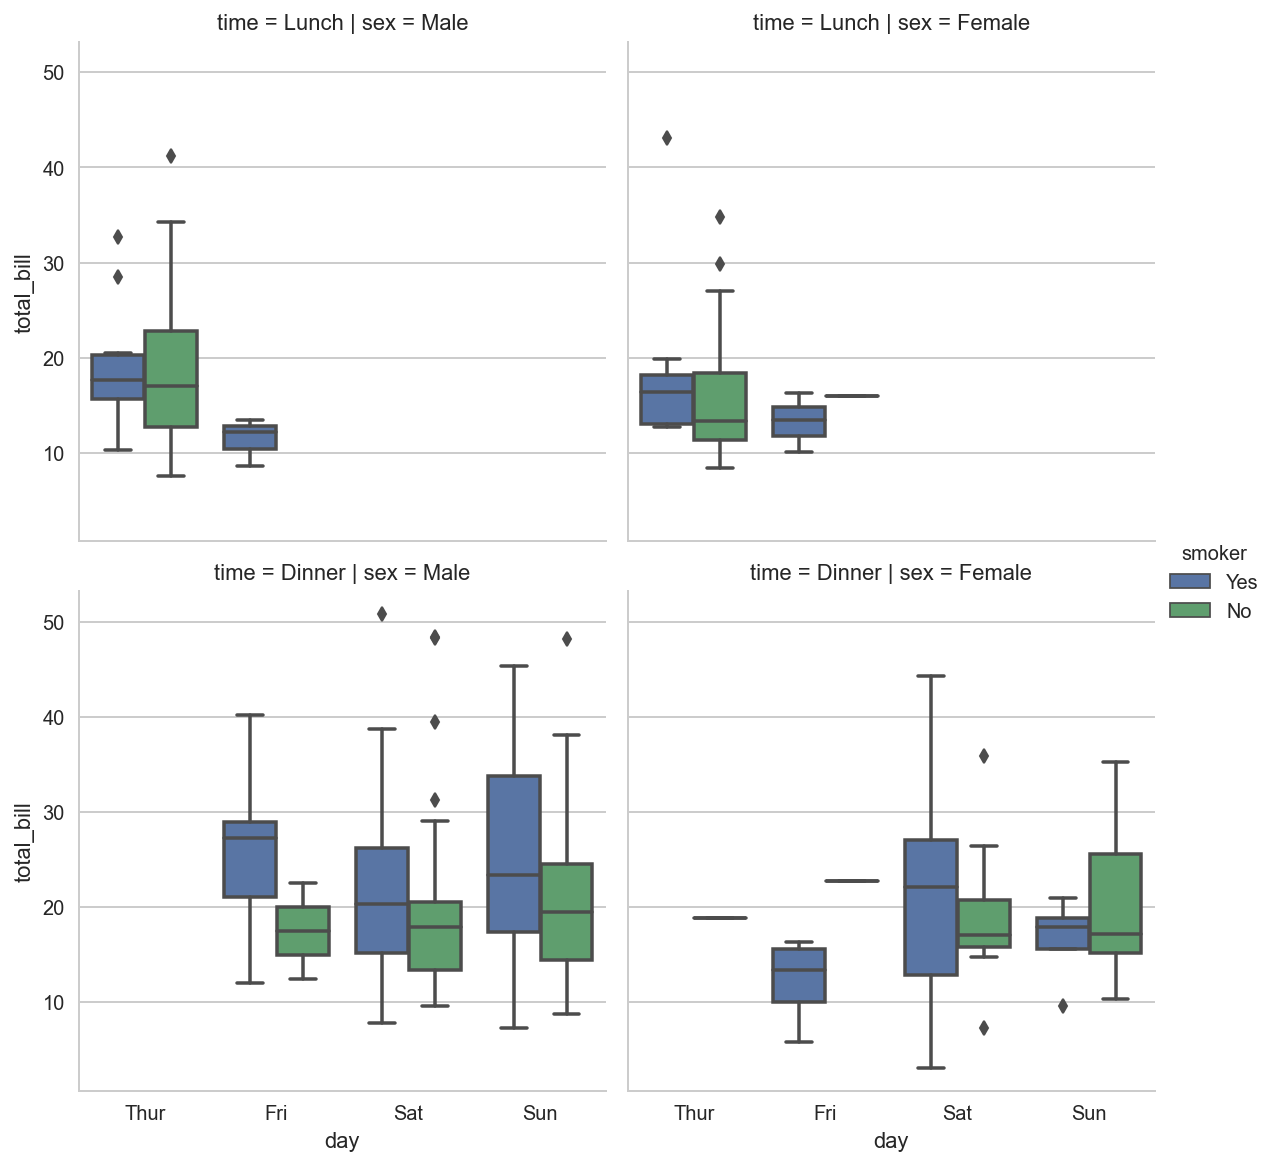

In [61]:
sns.catplot(data=dfTip, x='day', y='total_bill', hue='smoker', col='sex', row='time', kind='box', height=4)
plt.show()

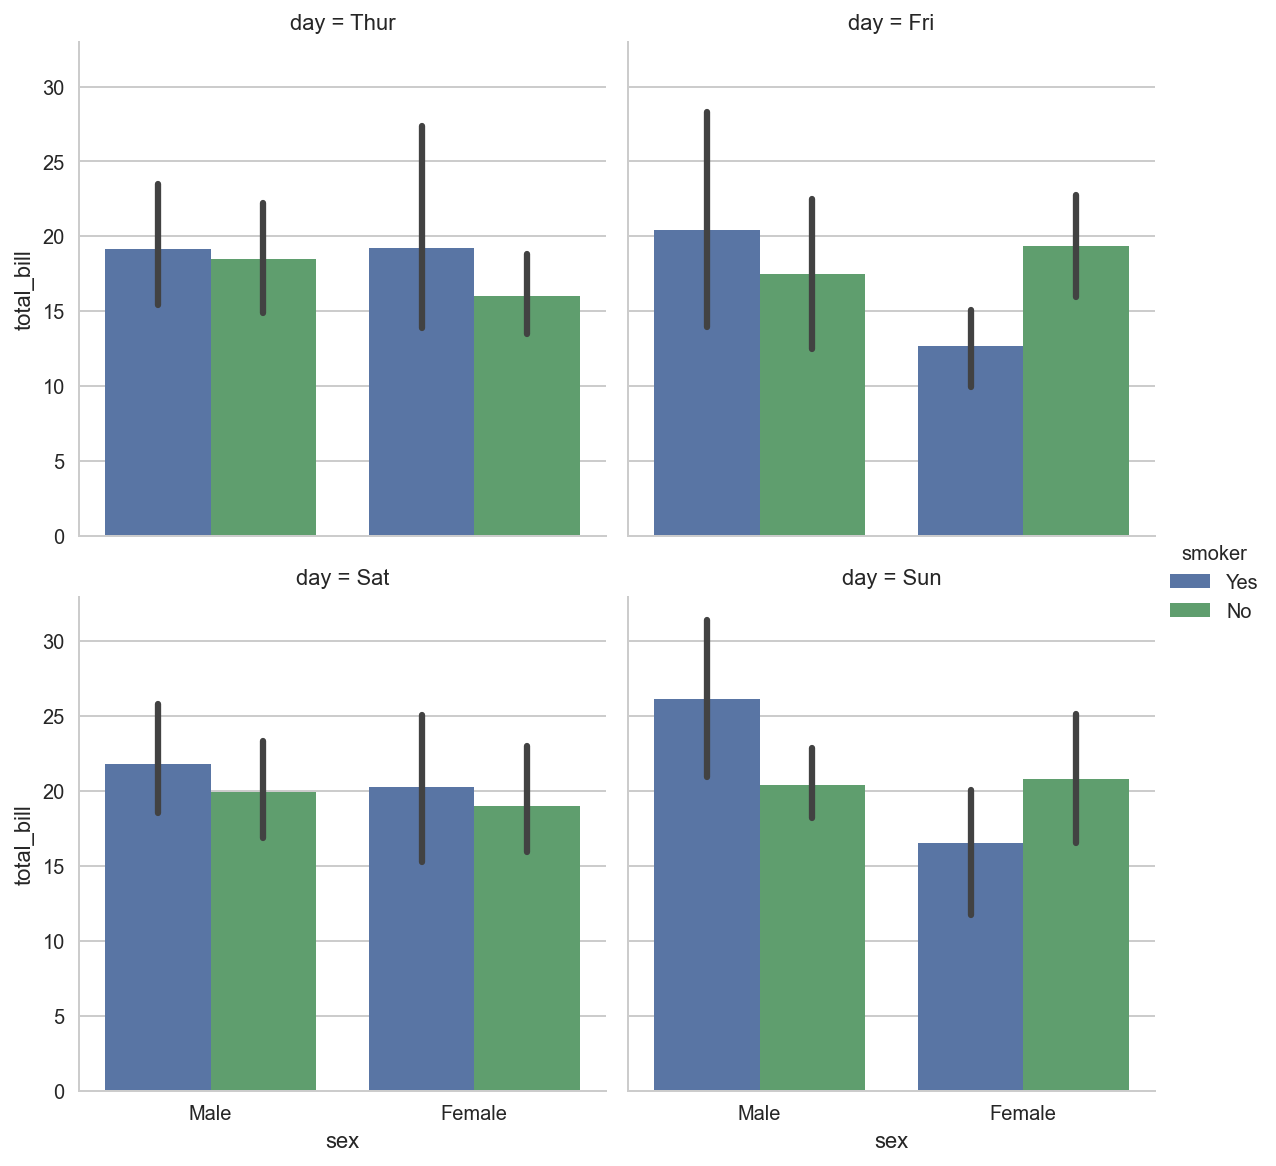

In [62]:
sns.catplot(data=dfTip, x='sex', y='total_bill', hue='smoker', col='day', kind='bar', col_wrap=2, height=4)
plt.show()

## 4.4. Pair Grid
Similar to Facet Grid, Pair Grid is also a matrix of plots each column and row is assigned to a different quantitative variable, resulting the plots show pairwise relationships in the dataset. Pair Grid can be compared with correlation matrix.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [64]:
dfIris = sns.load_dataset('iris')
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


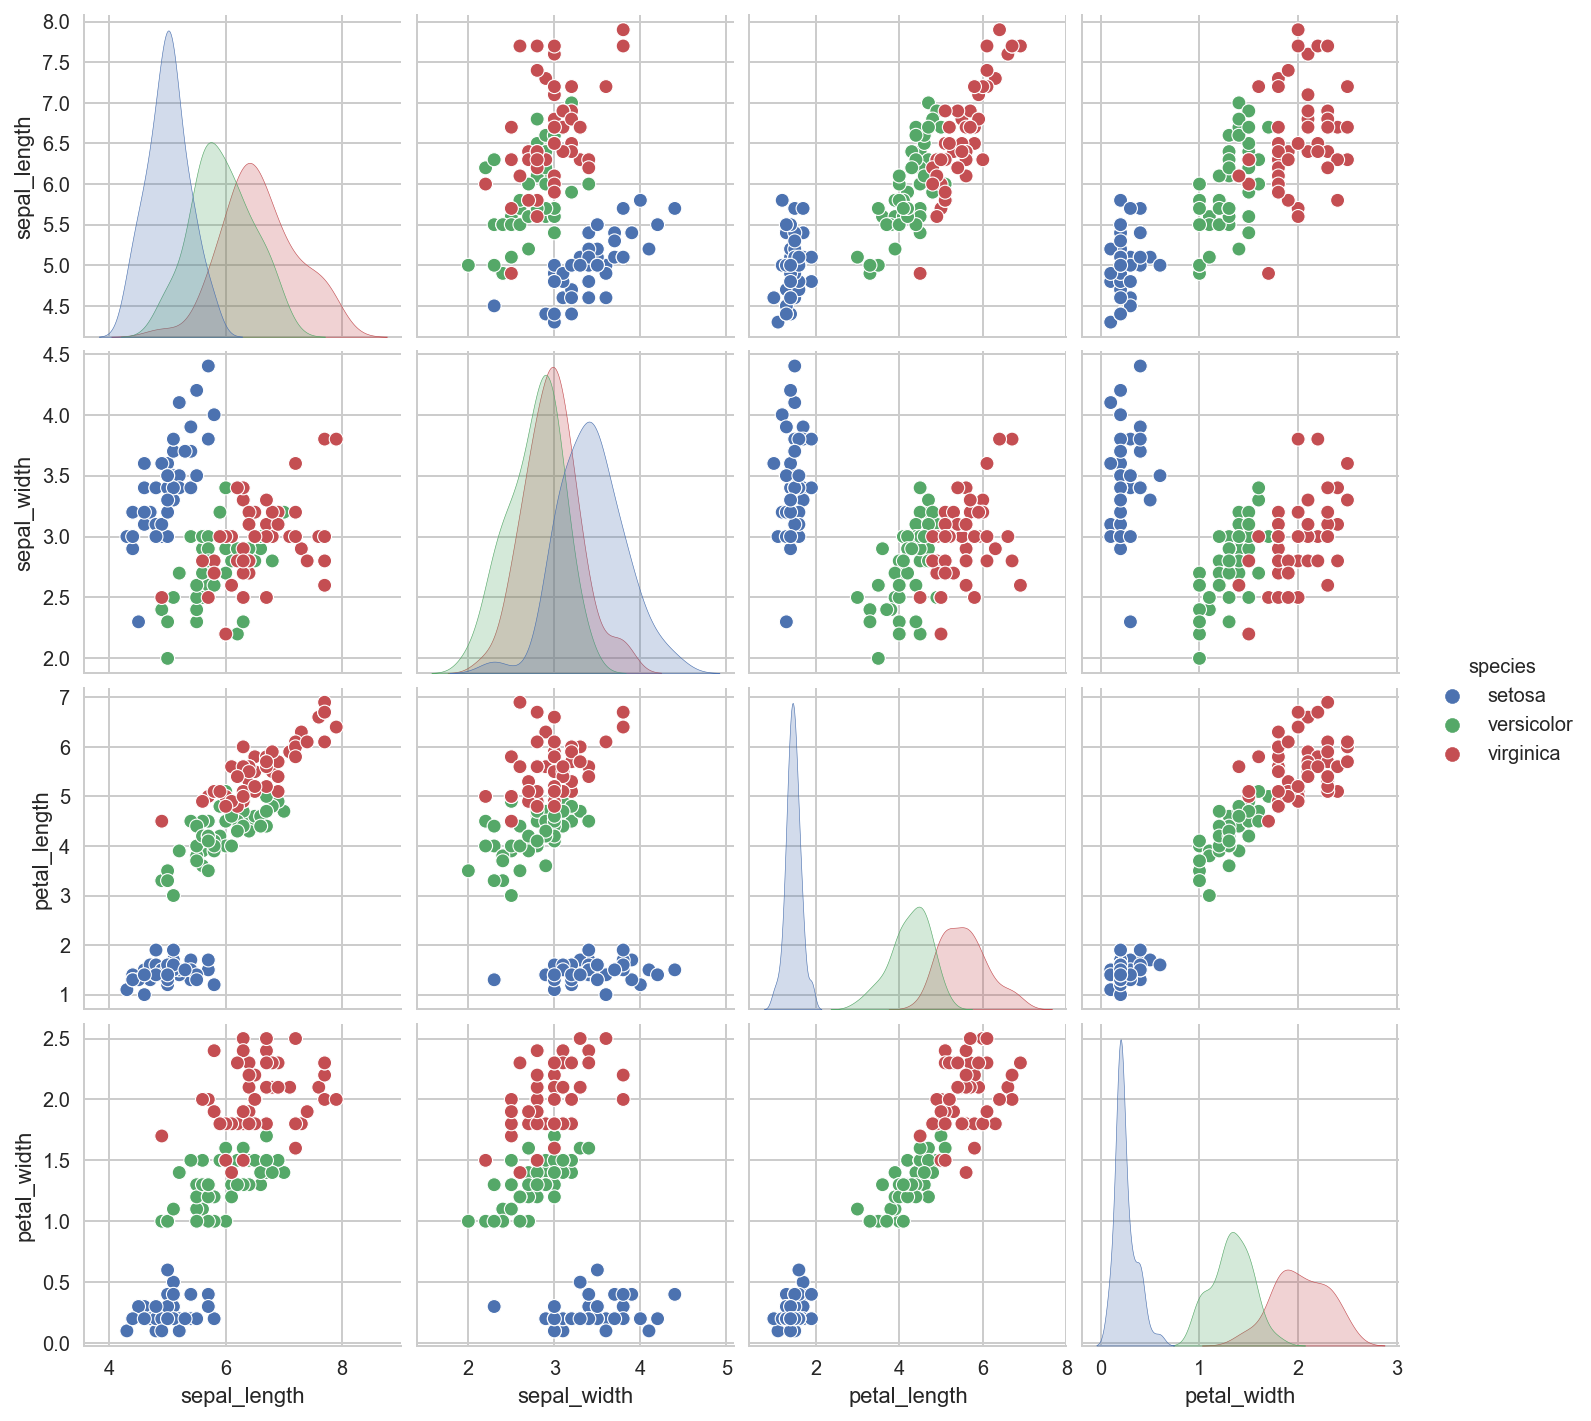

In [65]:
sns.pairplot(data=dfIris, hue='species')
plt.show()

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*